# Machine Learning Indonesia.AI
Pertemuan - 2 Data Visualisasi

## Libraries

In [49]:
from sklearn.datasets import load_iris

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib


plt.style.use('seaborn')

## Data Loading

### Set Iris data

In [51]:
iris = load_iris()

attribut = pd.DataFrame(iris.data)
target = pd.DataFrame(iris.target)

z = pd.concat([attribut,target], axis=1)

In [52]:
df = pd.DataFrame(z)
df.head()

,0,1,2,3,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Rename column

In [53]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


#### Change value

In [54]:
df['species'] = df['species'].replace(to_replace=[0,1,2], value=['setosa','versicolour','virginica'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Check Missing value

In [55]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Check Species

In [56]:
df['species'].value_counts()

virginica      50
versicolour    50
setosa         50
Name: species, dtype: int64

#### Describe datasets

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [58]:
print(f'Jumlah data : {df.shape[0]}')
print(f'Jumlah kolom : {df.shape[1]}')

Jumlah data : 150
Jumlah kolom : 5


## Data Visualisazation

Visual Categories :
1. Distribution
2. Comparison
3. Relationship
4. Composition

### Histogram - Distribution

##### Menggunakan Matplotlib

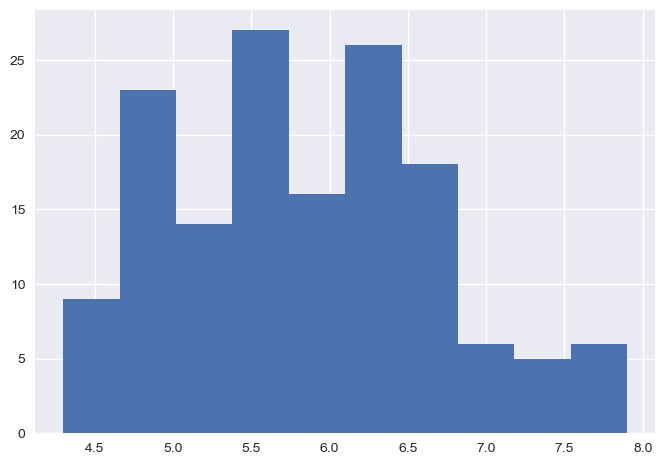

In [59]:
df['sepal_length'].hist() 
plt.show()

##### Menggunakan klib

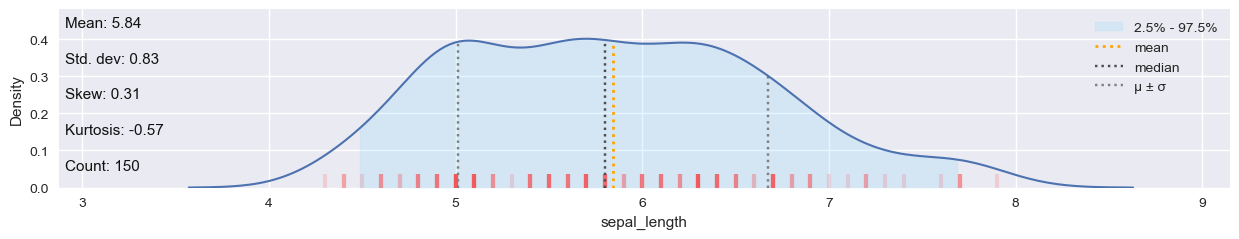

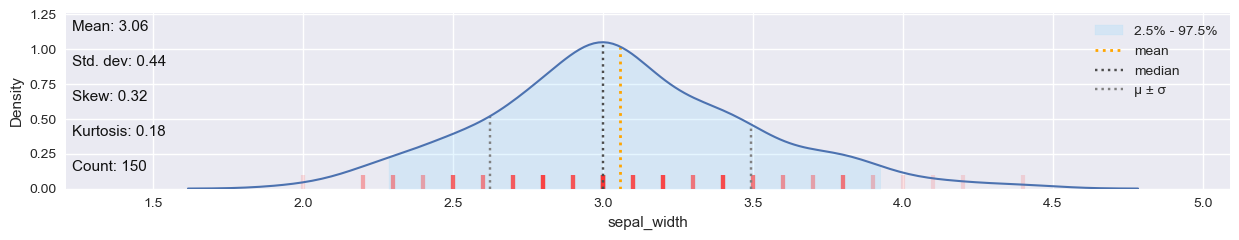

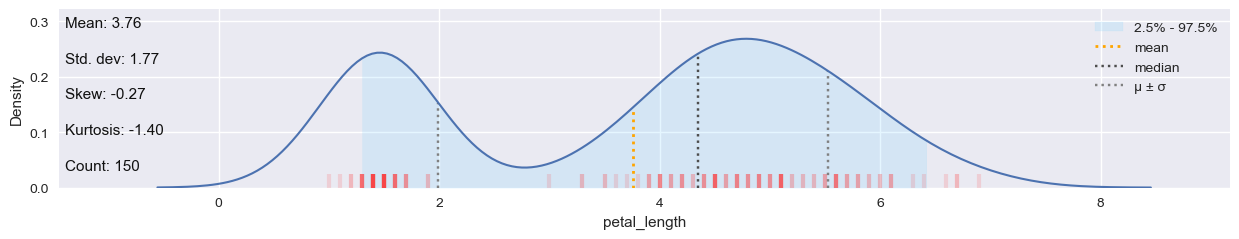

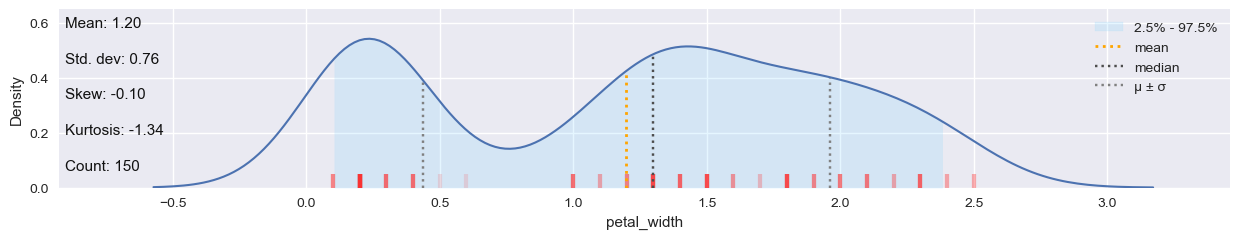

In [60]:
klib.dist_plot(df)
plt.show()

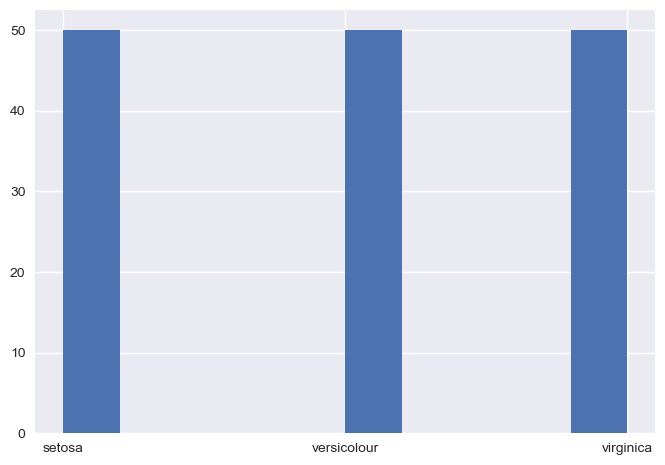

In [62]:
df['species'].hist()
plt.show()

##### Menggunakan seaborn

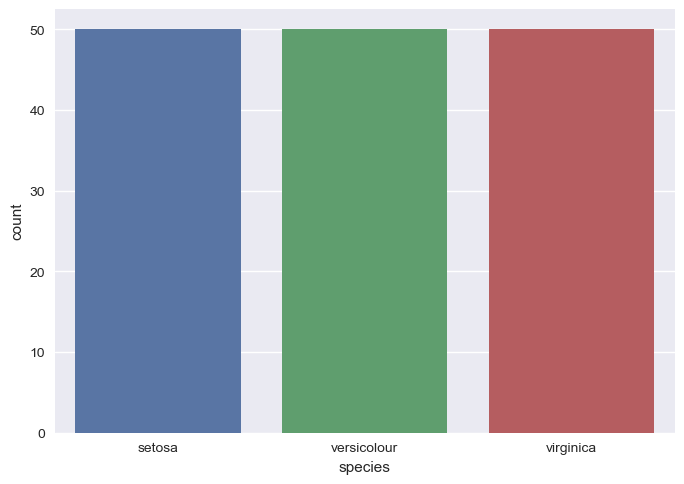

In [63]:
sns.countplot(x=df['species'])
plt.show()

### Scatter plot - Distribution & Relation

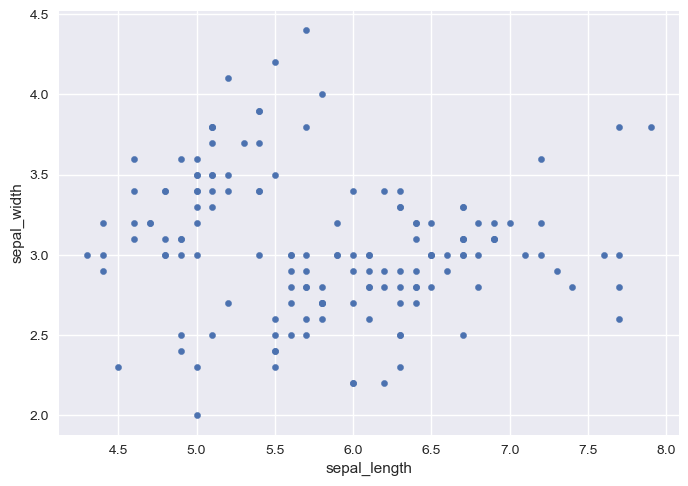

In [64]:
df.plot(kind='scatter',x='sepal_length',y='sepal_width')
plt.show()

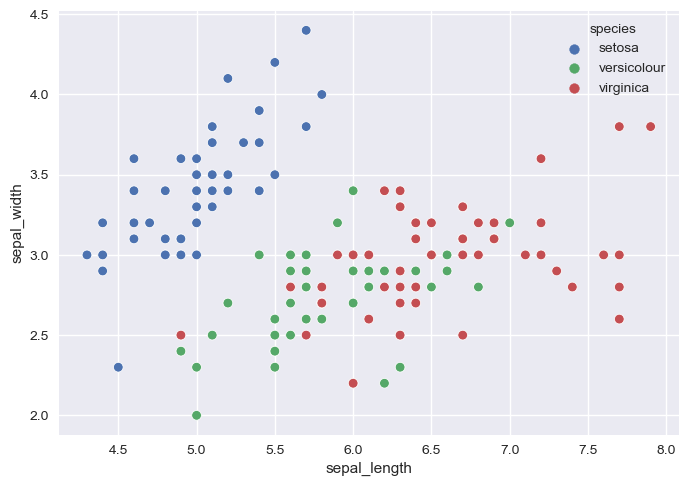

In [71]:
sns.scatterplot(data=df, x='sepal_length',y='sepal_width', hue='species')
plt.show()

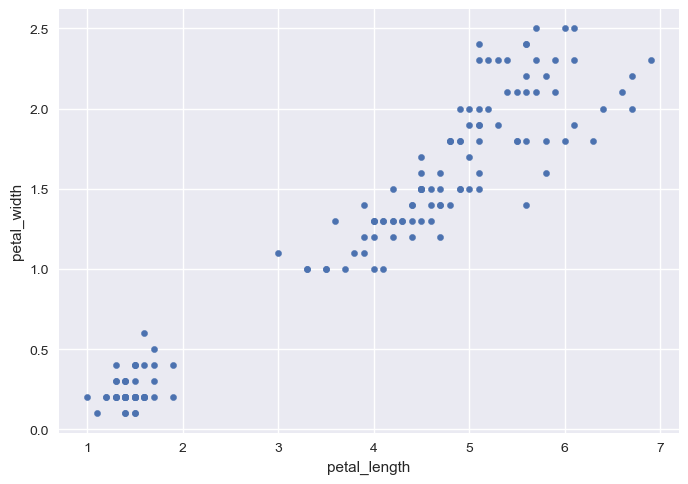

In [65]:
df.plot(kind='scatter',x='petal_length',y='petal_width')
plt.show()

Menggunakan seaborn memudahkan kita untuk melihat pesebaran data terhadap species menggunakan parameter `hue`

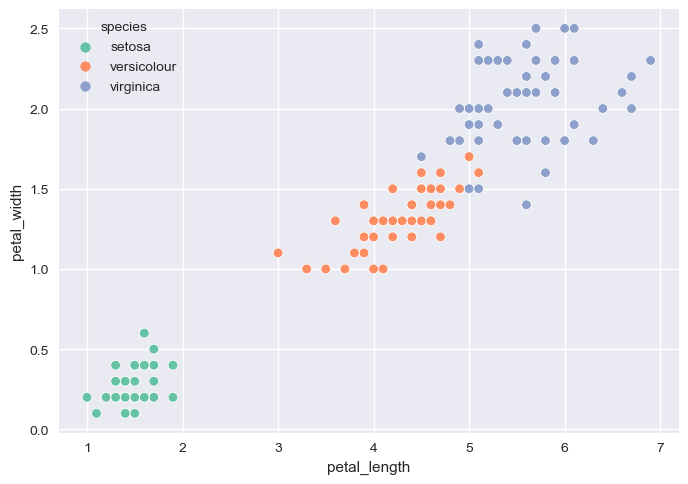

In [70]:
sns.scatterplot(data= df, x='petal_length',y='petal_width', hue='species', palette='Set2')
plt.show()

terlihat pada gambar dimana semakin pendek petal yang dimiliki maka `species` tersebut iyalah **setosa**, dan semakin panjang petal yang dimiliki maka `species` tersebut iyalah **virginica**

### Displot - Distribution

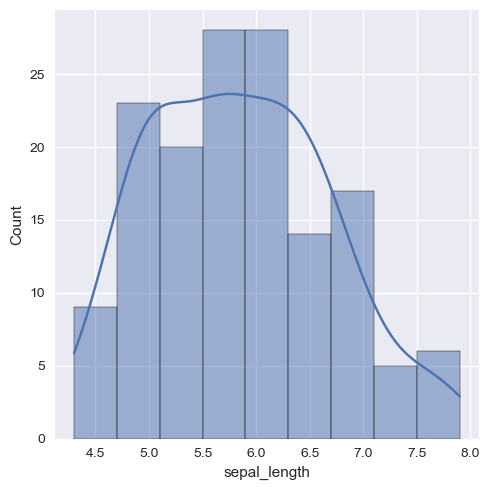

In [106]:
sns.displot(df['sepal_length'],kde=True)
plt.show()

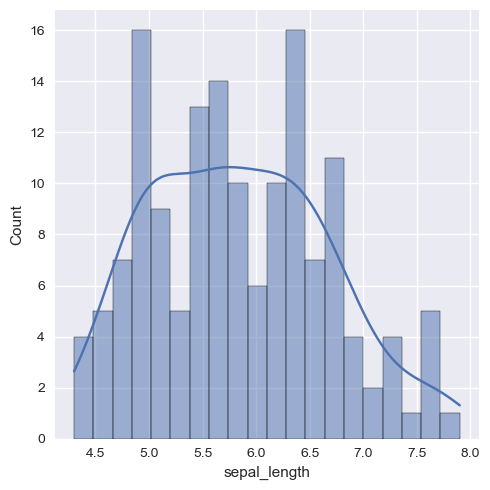

In [77]:
sns.displot(x=df['sepal_length'], kde=True, bins=20)
plt.show()

### Boxplot - Distribution & Comparition

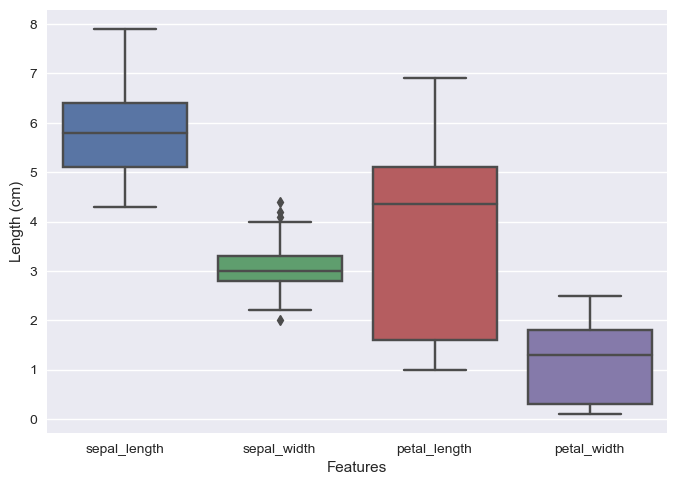

In [83]:
sns.boxplot(data=df)
plt.xlabel('Features')
plt.ylabel('Length (cm)')
plt.show()

Terlihat pada visualisasi ada indikasi `outliers` di sepal_width

#### Check petal_length on species

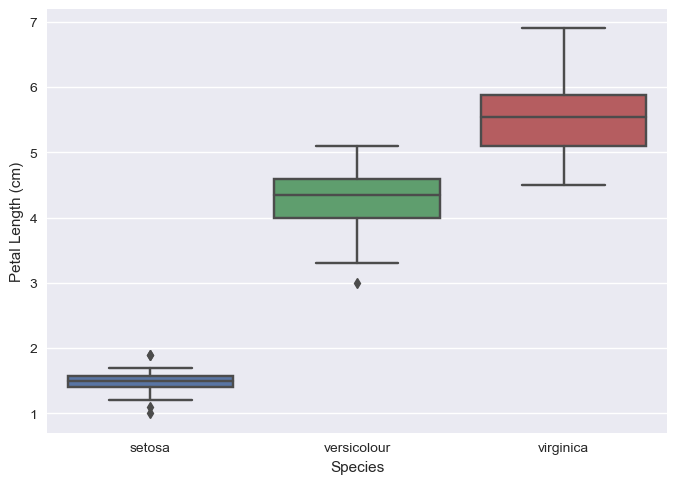

In [84]:
sns.boxplot(data=df, y='petal_length',x='species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

### Pairplot - Relation, Distribution, Comparison

Pairplot mevisualisasikan hanya data numeric

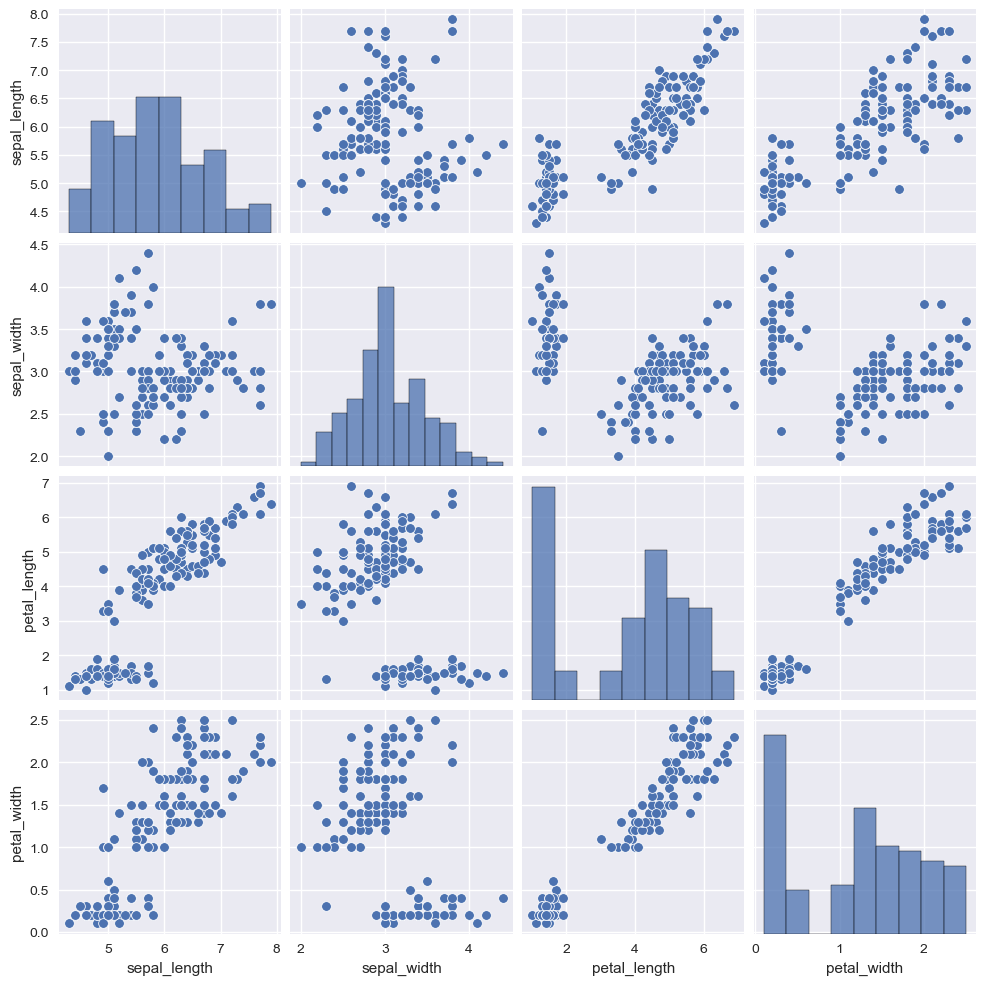

In [86]:
sns.pairplot(data=df)
plt.show()

#### Visualisasi data terhadapat species

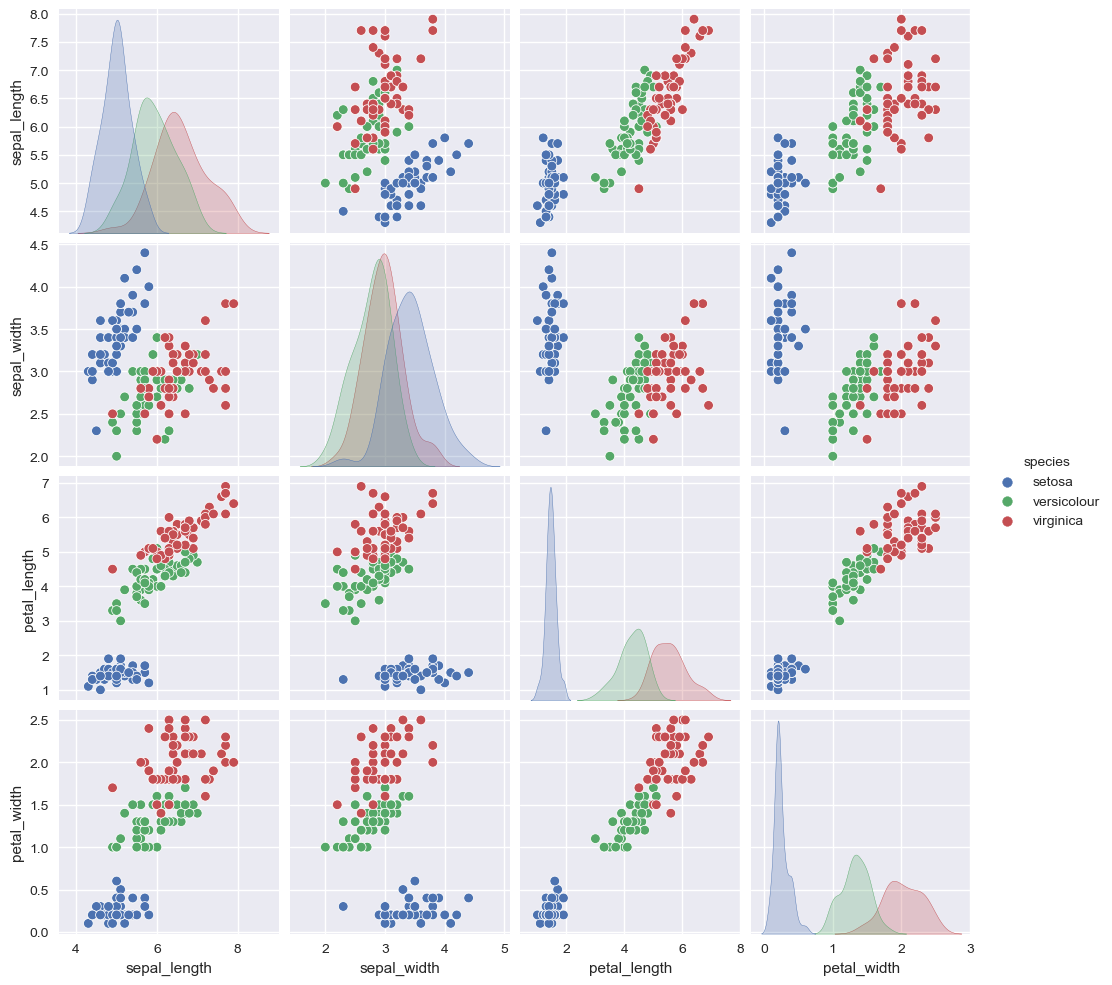

In [95]:
sns.pairplot(data=df, hue='species')
plt.show()

### Heatmap - Corelation

In [89]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


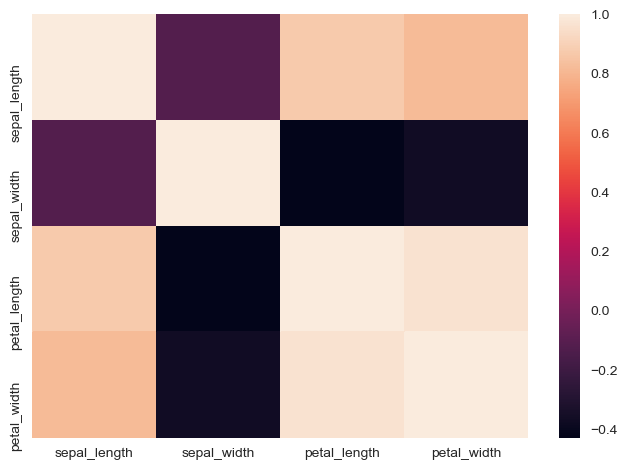

In [93]:
sns.heatmap(data=df.corr())
plt.show()

##### with annot = True 

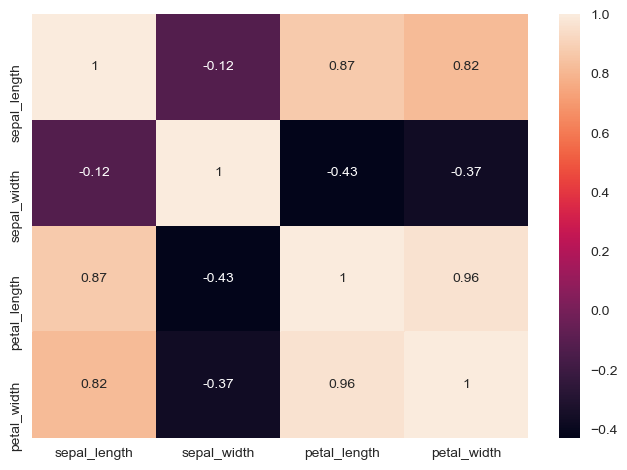

In [94]:
sns.heatmap(data=df.corr(), annot=True)
plt.show()

#### Keterangan :
![image](https://user-images.githubusercontent.com/76864673/139577422-73a2454f-5cac-4759-a6b6-7bc1125764f8.png)